In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

from tletools import TLE
from scipy.io import readsav

%matplotlib widget

In [2]:
start = dt.datetime(2015,6,1,0,0,0)
stop = dt.datetime(2015,7,1,0,0,0)

In [3]:
filepath = 'C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\OMNI\\';
# filepath = '/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/Data/OMNI/';
os.chdir(filepath)
filename = 'omni2_daily.txt'
SW_Data_daily = pd.DataFrame(np.loadtxt(filename),
                       columns = ['YEAR','DOY','Hour','Scalar B, nT','BX, nT (GSE, GSM)','BY, nT (GSE)','BZ, nT (GSE)','Kp index','R (Sunspot No.)','Dst-index, nT','ap_index, nT','f10.7_index','AE-index, nT','AL-index, nT','AU-index, nT','pc-index'])
time_array = [dt.datetime(int(SW_Data_daily.iloc[i,0]),1,1,0,0,0) + dt.timedelta(days = int(SW_Data_daily.iloc[i,1]-1)) + dt.timedelta(hours = int(SW_Data_daily.iloc[i,2])) for i in range(len(SW_Data_daily))]
SW_Data_daily.index = pd.DatetimeIndex(time_array)
SW_Data_daily = SW_Data_daily[(SW_Data_daily.index >= start) & (SW_Data_daily.index < stop - dt.timedelta(days=1))]
idx = np.where((SW_Data_daily['Dst-index, nT'] < 30.0) & (SW_Data_daily['Dst-index, nT'] > -30.0))[0]

In [3]:
filepath = 'C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\CNOFS\\'
# filepath = '/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/Data/CNOFS/'
os.chdir(filepath)
filename = 'NWN_2015.sav'
columns = ['Month','Day','Year','Hour','Minute','Second','alt','glat','glon','slt','N','quality flag']
Data = pd.DataFrame(readsav(filename)['nwm_data'].byteswap().newbyteorder(),columns = columns)
time_array = [dt.datetime(2000 + int(Data.iloc[i,2]),int(Data.iloc[i,0]),int(Data.iloc[i,1]),int(Data.iloc[i,3]),int(Data.iloc[i,4]),int(Data.iloc[i,5])) for i in range(len(Data))]
Data.index = pd.DatetimeIndex(time_array)
Data = Data[(Data.index >= start) & (Data.index <= stop)]


In [6]:
Data = Data.iloc[np.arange(0,len(Data),12),:]

In [6]:
no_of_days = int(np.ceil((Data.index[-1] - Data.index[0])/dt.timedelta(days=1)))
X = []; Data_NWM_avg = [];T = [];
for i in range(no_of_days-1):
    start = dt.datetime(2015,1,1,0,0,0) + dt.timedelta(days=i)
    stop = dt.datetime(2015,1,1,0,0,0) + dt.timedelta(days=i+1)
    T.append(start)
    Data_NWM_avg.append(Data['N'][(Data.index > start) & (Data.index < stop)].mean())
    X.append(Data['alt'][(Data.index > start) & (Data.index < stop)].mean())


In [9]:
Data_NWM_avg = [Data_NWM_avg[idx0] for idx0 in idx]
T = [T[idx0] for idx0 in idx]
X = [X[idx0] for idx0 in idx]

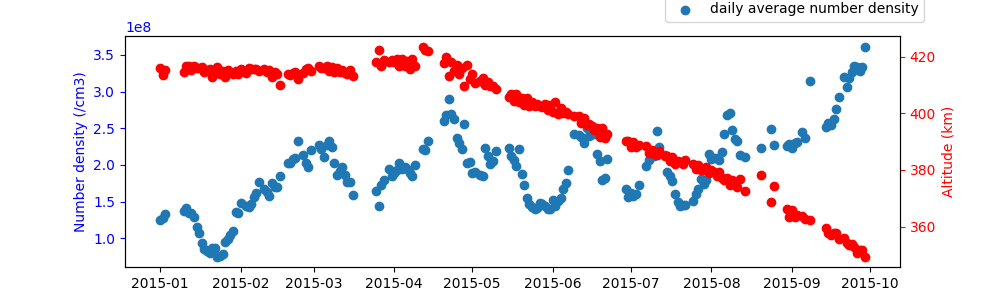

In [21]:
fig,ax = plt.subplots(figsize = [10,3])
ax.scatter(T,Data_NWM_avg,label = 'daily average number density')
ax.set_ylabel('Number density (/cm3)')
ax.yaxis.label.set_color('blue') 
ax.tick_params(axis='y', colors='blue')
ax1 = ax.twinx()
ax1.scatter(T,X,c = 'red')
ax1.set_ylabel('Altitude (km)')
ax1.yaxis.label.set_color('red') 
ax1.tick_params(axis='y', colors='red')
ax.legend(bbox_to_anchor=(1.04, 1.2), loc="upper right")

In [24]:
Data_NWM_avg = [Data['N'][(Data.index > dt.datetime(2015,1+i,1,0,0,0)) & (Data.index < dt.datetime(2015,2+i,1,0,0,0))].mean() for i in range(no_of_months-1)]

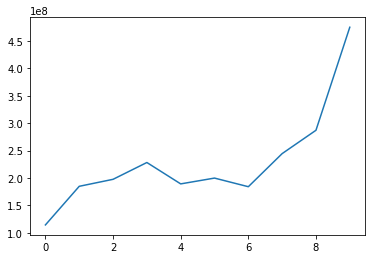

In [26]:
plt.figure()
plt.plot(Data_NWM_avg)

In [8]:
filepath = "C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\Temp\\"
os.chdir(filepath)
filename = 'CNOFS_NWM_' + start.strftime("%Y-%m-%d") + '.csv'
Data.to_csv(filename)

In [7]:
Data

,Month,Day,Year,Hour,Minute,Second,alt,glat,glon,slt,N,quality flag
2015-06-01 00:00:07,6.0,1.0,15.0,0.0,0.0,7.0,420.869995,12.30,337.359985,22.490000,10763900.0,1.0
2015-06-01 00:01:07,6.0,1.0,15.0,0.0,1.0,7.0,416.709991,12.58,341.059998,22.760000,12019200.0,1.0
2015-06-01 00:02:07,6.0,1.0,15.0,0.0,2.0,7.0,412.480011,12.79,344.779999,23.020000,16116500.0,1.0
2015-06-01 00:03:07,6.0,1.0,15.0,0.0,3.0,7.0,408.179993,12.94,348.500000,23.290001,22488700.0,1.0
2015-06-01 00:04:07,6.0,1.0,15.0,0.0,4.0,7.0,403.850006,13.03,352.239990,23.549999,30682100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-30 23:55:25,6.0,30.0,15.0,23.0,55.0,25.0,438.640015,11.04,124.900002,8.250000,87105104.0,1.0
2015-06-30 23:56:25,6.0,30.0,15.0,23.0,56.0,25.0,436.670013,10.55,128.529999,8.510000,88944704.0,1.0
2015-06-30 23:57:25,6.0,30.0,15.0,23.0,57.0,25.0,434.470001,10.00,132.149994,8.770000,90994304.0,1.0
2015-06-30 23:58:25,6.0,30.0,15.0,23.0,58.0,25.0,432.070007,9.41,135.759995,9.020000,93964200.0,1.0
